In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [5]:
df = pd.read_csv("cp_vs_T.csv")
data = df.to_numpy()
print(data[:5,:])

TK = data[:,0]
cp = data[:,-1]

[[298.         25.         25.97      442.4944624]
 [300.         27.         26.03      443.5167831]
 [400.        127.         28.46      484.9207701]
 [500.        227.         31.03      528.7101721]
 [600.        327.         34.85      593.7979213]]


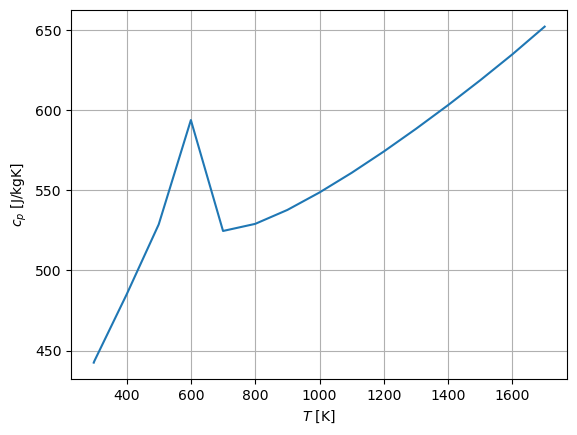

In [6]:
plt.plot(TK,cp)
plt.grid(1)
plt.xlabel("$T$ [K]")
plt.ylabel("$c_p$ [J/kgK]")
plt.show()

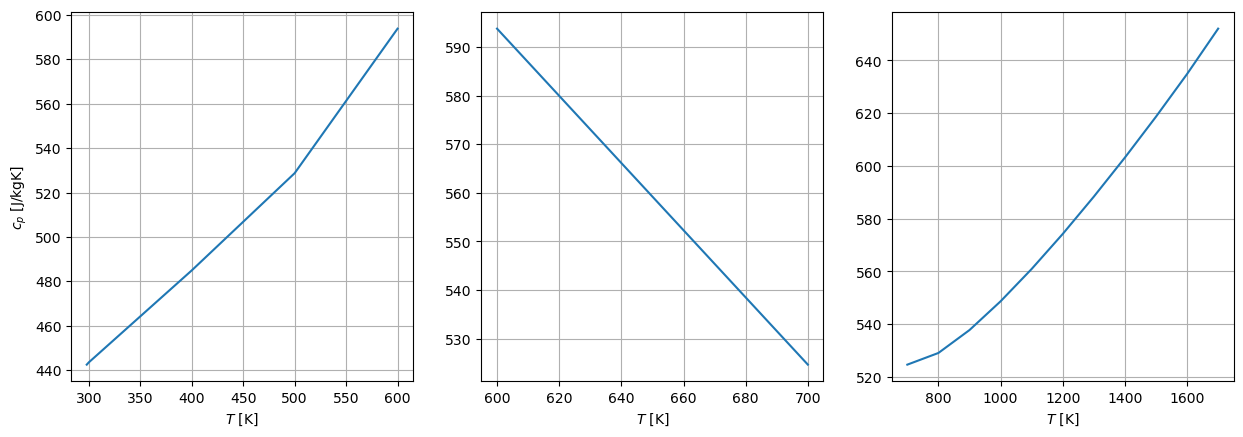

In [19]:
fig, axs = plt.subplots(1,3)
fig.set_figwidth(15)

axs[0].plot(TK[TK <= 600], cp[TK <= 600])
axs[0].set_xlabel("$T$ [K]")
axs[0].set_ylabel("$c_p$ [J/kgK]")
axs[0].grid(1)

axs[1].plot(TK[(TK >= 600) & (TK <= 700)], cp[(TK >= 600) & (TK <= 700)])
axs[1].set_xlabel("$T$ [K]")
axs[1].grid(1)

axs[2].plot(TK[TK >= 700], cp[TK >= 700])
axs[2].set_xlabel("$T$ [K]")
axs[2].grid(1)

plt.show()

In [50]:
poly_deg = 2
poly_func = PolynomialFeatures(poly_deg)

x1 = np.array(TK[TK <= 600]).reshape(-1,1)
t1 = poly_func.fit_transform(x1)
y1 = np.array(cp[TK <= 600]).reshape(-1,1)

x2 = np.array(TK[(TK >= 600) & (TK <= 700)]).reshape(-1,1)
y2 = np.array(cp[(TK >= 600) & (TK <= 700)]).reshape(-1,1)

x3 = np.array(TK[TK >= 700]).reshape(-1,1)
t3 = poly_func.fit_transform(x3)
y3 = np.array(cp[TK >= 700]).reshape(-1,1)

model1 = LinearRegression()
model2 = LinearRegression()
model3 = LinearRegression()

model1.fit(t1,y1)
model2.fit(x2,y2)
model3.fit(t3,y3)

print(f"set 1 coefs: {model1.intercept_} {model1.coef_}")
print(f"set 2 coefs: {model2.intercept_} {model2.coef_}")
print(f"set 3 coefs: {model3.intercept_} {model3.coef_}")

set 1 coefs: [398.18776737] [[ 0.         -0.02021752  0.00057432]]
set 2 coefs: [1008.8601127] [[-0.69177032]]
set 3 coefs: [497.38204089] [[ 0.00000000e+00 -3.70561459e-03  5.60806832e-05]]


In [51]:
y1_pred = model1.predict(t1)
y2_pred = model2.predict(x2)
y3_pred = model3.predict(t3)

Y = np.append(y1_pred,y2_pred[1:])
Y = np.append(Y,y3_pred[1:])

print(Y.shape)
print(cp.shape)
MSE = np.mean((Y - cp)**2)
print(f"MSE = {MSE}")

(16,)
(16,)
MSE = 1.793776184452693


In [52]:
def cp_disc(x):
    if 273 <= x <= 600:
        result = 398.18776737 + -0.02021752*x + 0.00057432*x**2
    elif 600 < x <= 700:
        result = 1008.8601127 + -0.69177032*x
    else:
        result = 497.38204089 + -3.70561459e-03*x + 5.60806832e-05*x**2

    return result

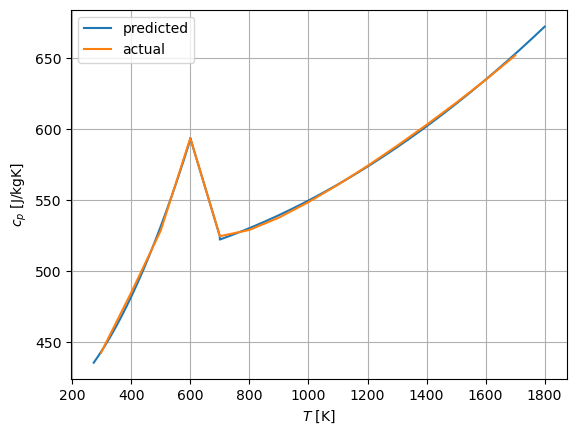

In [53]:
T_test = np.arange(273,1800,0.1)
model = []

for i in T_test:
    model.append(cp_disc(i))

plt.plot(T_test,model)
plt.plot(TK,cp)
plt.xlabel("$T$ [K]")
plt.ylabel("$c_p$ [J/kgK]")
plt.legend(["predicted", "actual"])
plt.grid(1)
plt.show()

Thus, the specific heat capacity of nickel can be modelled as:

$$c_p(T_K) = \left\{ \begin{array} {ll}
    398.188  - (2.022 \times 10^{-2})T_K + (5.743\times 10^{-4})T_K^2 & T_K \in [273,600]K \\ \\
    1008.860 + -0.692T_K & T_K \in (600,700]K \\ \\
    497.382  - (3.706\times 10^{-3})*T_K + (5.608\times 10^{-5})*T_K^2 & T_K > 700K
    \end{array}
    \right. $$

Where $T_K$ is the temperature in Kelvin.